Dataset Link: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/

Mount Google Drive to access dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import necessary machine learning libraries

In [ ]:
import pandas as pd # for dataframe manipulation
import numpy as np # for numerical operations

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
path = "/content/drive/MyDrive/dataset.csv" # change path to appropriate location in drive
songdata = pd.read_csv(path, index_col = 0)
songdata.head(10)

In [ ]:
songdata.tail(10)

The dataset contains information of various songs, including their names, artists, albums and other basic information, but for this project we are interested in the rest of the data. It contains 114000 songs, with the data being retrieved from Spotify's API.

This data shows with numerical values the different audio aspects of the song, such as its acousticness, tempo, time signature, loudness, and so on.

The goal of the project is the model is to be able to classify a song into a particular genre based on it's audio features.

Features ignored for this model:
- Track ID
- Artist
- Album
- Track Name
- Explicit
- Liveness

These features are to be removed when training the dataset as they are not values concerning the audio qualities of the song. Track ID, Artist, Album, Track Name, and Explicit are values which describe the track but not its audio qualities. Liveness, as written in Spotify's API, is a measure of how much audience noise was detected in the recording, or the likelihood that the song is a live recording.

Dataset Features to be analyzed:
- Popularity
- Danceability
- Energy
- Key
- Loudness
- Speechiness
- Acousticness
- Instrumentalness
- Valence
- Tempo

These are the audio qualities of the song that Spotify has available in its API, and thus these are the values which will be passed to train the dataset.

Target Variable:
- Track Genre

The Spotify API also provides the genre of each track, which will be our target for the model.

# Kernel Density Estimation
The following graphs show the distribution of values for each song feature in the dataset.

In [ ]:
# create 4x3 subplot to store each musical features KDE
fig, axs = plt.subplots(4, 3, figsize=(14, 14))

# KDE of each of the musical features
sns.kdeplot(songdata['popularity'], fill=True, color="b", ax=axs[0, 0])
sns.kdeplot(songdata['danceability'], fill=True, color="b", ax=axs[0, 1])
sns.kdeplot(songdata['energy'], fill=True, color="b", ax=axs[0, 2])
sns.kdeplot(songdata['key'], fill=True, color="b", ax=axs[1, 0])
sns.kdeplot(songdata['loudness'], fill=True, color="b", ax=axs[1, 1])
sns.kdeplot(songdata['speechiness'], fill=True, color="b", ax=axs[1, 2])
sns.kdeplot(songdata['acousticness'], fill=True, color="b", ax=axs[2, 0])
sns.kdeplot(songdata['instrumentalness'], fill=True, color="b", ax=axs[2, 1])
sns.kdeplot(songdata['valence'], fill=True, color="b", ax=axs[3, 0])
sns.kdeplot(songdata['tempo'], fill=True, color="b", ax=axs[3, 1])

# Data Pre-Processing
Before training the model, pre-processing must be done to clean the data and ensure smoother training.

As the dataset contains 114 genres with roughly 1000 tracks each, this will cause larger inaccuracy values when the model is created. In order to prevent this, only the songs from the top 5 most popular genres were used in training and testing the two models.


In [ ]:
# gets the top 10 genres based on popularity
genre_popularity = songdata.groupby('track_genre')['popularity'].mean()

sorted_genres = genre_popularity.sort_values(ascending=False)

top_5_genres = sorted_genres.head(5)
print("Top 5 genres with the highest average popularity:")
print(top_5_genres)

# drops the songs that is not included in the top 10 genre
top_5_genres = sorted_genres.head(5).index.tolist()

songdata = songdata[songdata['track_genre'].isin(top_5_genres)]
songdata

Top 5 genres with the highest average popularity:
track_genre
pop-film    59.283
k-pop       56.896
chill       53.651
sad         52.379
grunge      49.594
Name: popularity, dtype: float64


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15000,47isJpIIO8m7BJEhiFhnaf,dhruv,double take,double take,75,171743,False,0.456,0.437,8,-11.156,1,0.0867,0.8390,0.000000,0.2180,0.2090,108.678,4,chill
15001,5e2l2ZAMwHmrkdM4Z6NhAR,Shiloh Dynasty;Timmies,Vivid Pictures,Again,74,157205,False,0.603,0.204,7,-12.727,0,0.1120,0.4790,0.071400,0.6420,0.7100,74.688,5,chill
15002,3XV5r1cMB2AlD2ir0v6mfm,yaeow;Neptune,The Way I Love You,The Way I Love You,60,162726,False,0.543,0.206,6,-18.037,1,0.0319,0.9400,0.453000,0.3850,0.1300,113.107,3,chill
15003,5HsSsEeP3hU9QSfHZrzbtA,Finding Hope,Our Love,3:00 AM,68,201951,False,0.550,0.147,0,-18.675,0,0.0404,0.5630,0.001020,0.2860,0.0346,81.991,4,chill
15004,22I3h5AOENlH4CqXJsEbFR,Justine Skye;Tyga,Collide (feat. Tyga),Collide (feat. Tyga),75,260169,True,0.418,0.310,11,-9.869,0,0.0625,0.0950,0.000000,0.2160,0.1310,139.614,4,chill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,4DqNBM2oUr5R87cUd2E3P6,Josh A,LONELY VIBES (Deluxe),PTSD,41,121867,False,0.644,0.637,7,-7.922,1,0.0898,0.3820,0.000000,0.1410,0.2160,81.479,4,sad
94996,6HdrRVMieDZtv0vldfZxqg,Rarin,Day Ones,Day Ones,47,134913,True,0.739,0.639,9,-8.636,1,0.2530,0.1190,0.000000,0.1190,0.4820,143.044,4,sad
94997,6hzTeCA93yeY8WZE0kW3ui,Powfu,some boring love stories pt 5,clash of the titans,42,110000,False,0.727,0.419,1,-8.334,1,0.1870,0.5950,0.000000,0.1120,0.7510,158.344,4,sad
94998,7sFRIgzKlKRSfBDWUvtpwU,LoveJSan,Saddest Popstar to Live,I Got You Flowers!,49,154000,True,0.598,0.540,7,-6.199,1,0.0363,0.0504,0.000144,0.2110,0.2440,140.130,4,sad


To clean the dataset further, duplicate songs were dropped, which reduced the number of rows in the dataset by 4.

In [ ]:
songdata = songdata.drop_duplicates(keep="first")
songdata

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15000,47isJpIIO8m7BJEhiFhnaf,dhruv,double take,double take,75,171743,False,0.456,0.437,8,-11.156,1,0.0867,0.8390,0.000000,0.2180,0.2090,108.678,4,chill
15001,5e2l2ZAMwHmrkdM4Z6NhAR,Shiloh Dynasty;Timmies,Vivid Pictures,Again,74,157205,False,0.603,0.204,7,-12.727,0,0.1120,0.4790,0.071400,0.6420,0.7100,74.688,5,chill
15002,3XV5r1cMB2AlD2ir0v6mfm,yaeow;Neptune,The Way I Love You,The Way I Love You,60,162726,False,0.543,0.206,6,-18.037,1,0.0319,0.9400,0.453000,0.3850,0.1300,113.107,3,chill
15003,5HsSsEeP3hU9QSfHZrzbtA,Finding Hope,Our Love,3:00 AM,68,201951,False,0.550,0.147,0,-18.675,0,0.0404,0.5630,0.001020,0.2860,0.0346,81.991,4,chill
15004,22I3h5AOENlH4CqXJsEbFR,Justine Skye;Tyga,Collide (feat. Tyga),Collide (feat. Tyga),75,260169,True,0.418,0.310,11,-9.869,0,0.0625,0.0950,0.000000,0.2160,0.1310,139.614,4,chill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,4DqNBM2oUr5R87cUd2E3P6,Josh A,LONELY VIBES (Deluxe),PTSD,41,121867,False,0.644,0.637,7,-7.922,1,0.0898,0.3820,0.000000,0.1410,0.2160,81.479,4,sad
94996,6HdrRVMieDZtv0vldfZxqg,Rarin,Day Ones,Day Ones,47,134913,True,0.739,0.639,9,-8.636,1,0.2530,0.1190,0.000000,0.1190,0.4820,143.044,4,sad
94997,6hzTeCA93yeY8WZE0kW3ui,Powfu,some boring love stories pt 5,clash of the titans,42,110000,False,0.727,0.419,1,-8.334,1,0.1870,0.5950,0.000000,0.1120,0.7510,158.344,4,sad
94998,7sFRIgzKlKRSfBDWUvtpwU,LoveJSan,Saddest Popstar to Live,I Got You Flowers!,49,154000,True,0.598,0.540,7,-6.199,1,0.0363,0.0504,0.000144,0.2110,0.2440,140.130,4,sad


After removing duplicates, null values were dropped as well, which removed 1 row from the dataset.


In [ ]:
songdata = songdata.dropna()
songdata

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15000,47isJpIIO8m7BJEhiFhnaf,dhruv,double take,double take,75,171743,False,0.456,0.437,8,-11.156,1,0.0867,0.8390,0.000000,0.2180,0.2090,108.678,4,chill
15001,5e2l2ZAMwHmrkdM4Z6NhAR,Shiloh Dynasty;Timmies,Vivid Pictures,Again,74,157205,False,0.603,0.204,7,-12.727,0,0.1120,0.4790,0.071400,0.6420,0.7100,74.688,5,chill
15002,3XV5r1cMB2AlD2ir0v6mfm,yaeow;Neptune,The Way I Love You,The Way I Love You,60,162726,False,0.543,0.206,6,-18.037,1,0.0319,0.9400,0.453000,0.3850,0.1300,113.107,3,chill
15003,5HsSsEeP3hU9QSfHZrzbtA,Finding Hope,Our Love,3:00 AM,68,201951,False,0.550,0.147,0,-18.675,0,0.0404,0.5630,0.001020,0.2860,0.0346,81.991,4,chill
15004,22I3h5AOENlH4CqXJsEbFR,Justine Skye;Tyga,Collide (feat. Tyga),Collide (feat. Tyga),75,260169,True,0.418,0.310,11,-9.869,0,0.0625,0.0950,0.000000,0.2160,0.1310,139.614,4,chill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,4DqNBM2oUr5R87cUd2E3P6,Josh A,LONELY VIBES (Deluxe),PTSD,41,121867,False,0.644,0.637,7,-7.922,1,0.0898,0.3820,0.000000,0.1410,0.2160,81.479,4,sad
94996,6HdrRVMieDZtv0vldfZxqg,Rarin,Day Ones,Day Ones,47,134913,True,0.739,0.639,9,-8.636,1,0.2530,0.1190,0.000000,0.1190,0.4820,143.044,4,sad
94997,6hzTeCA93yeY8WZE0kW3ui,Powfu,some boring love stories pt 5,clash of the titans,42,110000,False,0.727,0.419,1,-8.334,1,0.1870,0.5950,0.000000,0.1120,0.7510,158.344,4,sad
94998,7sFRIgzKlKRSfBDWUvtpwU,LoveJSan,Saddest Popstar to Live,I Got You Flowers!,49,154000,True,0.598,0.540,7,-6.199,1,0.0363,0.0504,0.000144,0.2110,0.2440,140.130,4,sad


## Shuffle Data
This is done to avoid bias in the data when passed to the model.

In [ ]:
songdata = songdata.sample(frac = 1, ignore_index=1, random_state=1)
songdata

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0JR95zeccPfpDB1WhYBOAd,Our Lady Peace,Naveed,Hope,24,313973,False,0.553,0.846,6,-8.037,0,0.0379,0.00157,0.000000,0.0693,0.347,125.258,4,grunge
1,3PDNGdhCtiQemL14eKhCup,"nothing,nowhere.",Trauma Factory,lights (4444),52,160422,True,0.718,0.690,0,-7.299,1,0.0795,0.04190,0.000419,0.1050,0.428,89.982,4,sad
2,1HT0RzPuChHC1kWbIplHyw,Rahat Fateh Ali Khan;Shreya Ghoshal,Bodyguard,Teri Meri,62,325311,False,0.401,0.517,2,-6.618,0,0.0481,0.06610,0.000000,0.2020,0.471,128.451,4,pop-film
3,7CcxIeSvx9NE2X8EumKGJL,A.R. Rahman;NJ;Neeraj Madhav,"Porattam (From ""Vendhu Thanindhathu Kaadu"")","Porattam - From ""Vendhu Thanindhathu Kaadu""",56,122175,False,0.452,0.868,1,-6.030,1,0.2480,0.23400,0.000000,0.0783,0.512,196.512,3,pop-film
4,5ZEc110fxhvZTkIxnBC8hD,SadBoyProlific,Merlin,Merlin,51,192738,True,0.744,0.346,8,-13.948,1,0.3180,0.87200,0.000006,0.1320,0.375,90.076,4,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,2Qk3D872tEmCeSZ9lXIbbe,PSY,Halloween Party Canzoni per Bambini 2022,Gangnam Style (강남스타일),0,219493,False,0.727,0.937,11,-2.871,0,0.2860,0.00417,0.000000,0.0910,0.749,132.067,4,k-pop
4991,7J0E3iSjAxIdQtArstSfIJ,Raghu Dixit;Siddhartha Belmannu;Rakshita Suresh,Ninna Sanihake (Original Motion Picture Soundt...,Nee Parichaya,46,218017,False,0.679,0.608,0,-10.187,0,0.0368,0.63900,0.000008,0.0873,0.361,116.043,4,k-pop
4992,1vlzSY7AttAiAvSEe1JbVs,Elijah Who,Gentle Boy,crush on you,57,84023,False,0.578,0.172,1,-13.684,1,0.3500,0.88300,0.000003,0.4010,0.424,138.717,4,chill
4993,19PknyOL6OWvABerPEyweT,Santhosh Narayanan;Arunraja Kamaraj,Kabali (Original Motion Picture Soundtrack),Neruppu Da,56,217934,False,0.576,0.836,4,-3.666,1,0.0470,0.09170,0.000027,0.4470,0.481,90.040,4,pop-film


# Dropping Unnecessary Columns

In [ ]:
# Leave only audio qualities
feature_matrix = songdata.drop(['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'liveness', 'track_genre'], axis = 1)
target = songdata['track_genre']
feature_matrix

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,time_signature
0,24,313973,0.553,0.846,6,-8.037,0,0.0379,0.00157,0.000000,0.347,125.258,4
1,52,160422,0.718,0.690,0,-7.299,1,0.0795,0.04190,0.000419,0.428,89.982,4
2,62,325311,0.401,0.517,2,-6.618,0,0.0481,0.06610,0.000000,0.471,128.451,4
3,56,122175,0.452,0.868,1,-6.030,1,0.2480,0.23400,0.000000,0.512,196.512,3
4,51,192738,0.744,0.346,8,-13.948,1,0.3180,0.87200,0.000006,0.375,90.076,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,0,219493,0.727,0.937,11,-2.871,0,0.2860,0.00417,0.000000,0.749,132.067,4
4991,46,218017,0.679,0.608,0,-10.187,0,0.0368,0.63900,0.000008,0.361,116.043,4
4992,57,84023,0.578,0.172,1,-13.684,1,0.3500,0.88300,0.000003,0.424,138.717,4
4993,56,217934,0.576,0.836,4,-3.666,1,0.0470,0.09170,0.000027,0.481,90.040,4


# Split Dataset into Training and Testing Samples
For this project, the split will be 70% of the data being used for training, and 30% used for testing

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split, 30% of data used to test and 70% used to train
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, target, test_size = 0.3, random_state=1)

# Scale Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gaussian Naive Bayes Implementation

# Feed Data into Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

## Training and Test Set Scores

In [ ]:
gaussian_training_score = model.score(X_train_scaled, y_train)
gaussian_test_score = model.score(X_test_scaled, y_test)

print("training set score: %f" % gaussian_training_score)
print("test set score: %f" % gaussian_test_score)

training set score: 0.528032
test set score: 0.523015


# Accuracy and Classification Report

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_predict = model.predict(X_test_scaled)

gaussian_accuracy = accuracy_score(y_test, y_predict)

print(f'Accuracy: {gaussian_accuracy}')
print(f'\nClassification Report:{classification_report(y_test, y_predict)}')

Accuracy: 0.5230153435623749

Classification Report:              precision    recall  f1-score   support

       chill       0.55      0.31      0.40       309
      grunge       0.74      0.82      0.78       298
       k-pop       0.45      0.29      0.35       295
    pop-film       0.41      0.81      0.55       312
         sad       0.55      0.38      0.44       285

    accuracy                           0.52      1499
   macro avg       0.54      0.52      0.50      1499
weighted avg       0.54      0.52      0.50      1499



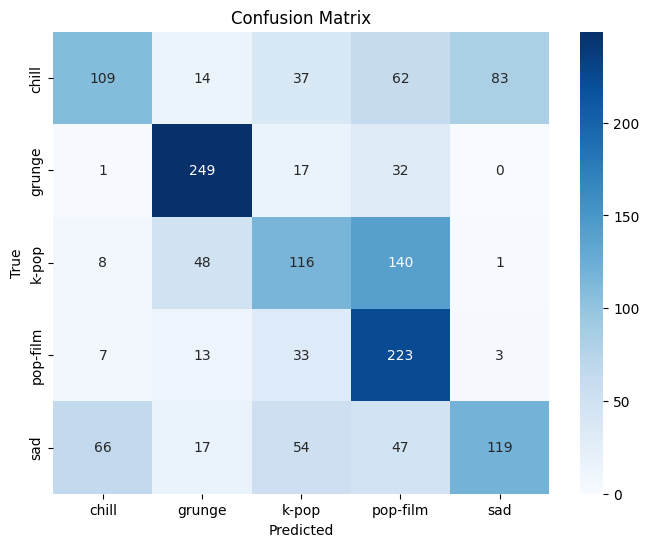

In [ ]:
from sklearn.metrics import confusion_matrix

genres = ['chill', 'grunge', 'k-pop', 'pop-film', 'sad']

conf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=genres, yticklabels=genres)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

This graph helps in understanding how the Gaussian Naive Bayes implementation performs across the different genres. The confusion matrix heatmap visualizes each cell in the matrix that correspond to the number of instances that were correctly or incorrectly predicted for each of the top genres.

Based on the graph, the highest predictions lie on the diagonal. These high predictions landing on the true positive cells indicate that the model is generally doing well in correctly predicting instances for each genre. Moreover, this indicates that the model can accurately distinguish between the different genres.

In kpop and pop-fim, similarities in music features and the shared subcategory of "pop" have relatively high instances which leads to a certain level of confusion between these musically-adjacent genres. This leads us to the conclusion that similar musical features makes it more challenging for the model to distinguish between genres.

# K Nearest Neighbor Classification

# Feed Data into Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 100) # optimal_k
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=100)

# Training and Test Scores

In [ ]:
knn_training_score = knn.score(X_train_scaled, y_train)
knn_test_score = knn.score(X_test_scaled, y_test)
print("training set score: %f" % knn_training_score)
print("test set score: %f" % knn_test_score)

training set score: 0.608410
test set score: 0.591728


# Accuracy and Classification Report

In [ ]:
y_predict = knn.predict(X_test_scaled)

knn_accuracy = accuracy_score(y_test, y_predict)

print(f'Accuracy: {knn_accuracy}')
print(f'\nClassification Report:{classification_report(y_test, y_predict)}')

Accuracy: 0.5917278185456971

Classification Report:              precision    recall  f1-score   support

       chill       0.55      0.44      0.49       309
      grunge       0.71      0.88      0.78       298
       k-pop       0.55      0.45      0.49       295
    pop-film       0.59      0.68      0.63       312
         sad       0.52      0.51      0.51       285

    accuracy                           0.59      1499
   macro avg       0.58      0.59      0.58      1499
weighted avg       0.58      0.59      0.58      1499



# Comparison
We can now compare the training score, test score, and accuracy values of both models.

In [ ]:
# create a comparison graph between the two models used
models = ['Gaussian Naive Bayes', 'KNN']
training_scores = [gaussian_training_score, knn_training_score]
test_scores = [gaussian_test_score, knn_test_score]

plt.bar(models, training_scores, label='Training Set Score')
plt.bar(models, test_scores, label='Test Set Score', alpha=0.7)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Test Set Scores')
plt.legend()
plt.show()

print("\nGaussian Naive Training Set Score: %f" % gaussian_training_score)
print("Gaussian Test Set Score: %f" % gaussian_test_score)
print(f'Gaussian Accuracy: {gaussian_accuracy}\n')

print("KNN Training Set Score: %f" % knn_training_score)
print("KNN Test Set Score: %f" % knn_test_score)
print(f'KNN Accuracy: {knn_accuracy}')

Gaussian Naive Training Set Score: 0.528032
Gaussian Test Set Score: 0.523015
Gaussian Accuracy: 0.5230153435623749
KNN Training Set Score: 0.608410
KNN Test Set Score: 0.591728
KNN Accuracy: 0.5917278185456971


The graph shows the KNN model outperforms the Gaussian Naive Bayes model in terms of accuracy on both the training and test sets. This suggests that, based on the provided features, the KNN algorithm is better at capturing the patterns in the music genre classification task based on the dataset used.

This is possibly due to the nature of the models used. Gaussian Naive Bayes is a machine learning model based in probability. It first assumes that the data is continuous and normalized. This is why it is considered a naive algorithm. Next, for each new entry to be classified, it classifies them based on how likely the entry is to have the values it has for each feature given that they belong to a certain classification.

For example, if a song has a high dancability, it will be calculated to be more likely to belong to genres that have a high dancability if plotted to a continuous normal graph. This is done for every feature, and the entry is then classified to whichever class produced the highest possibility after all calculations.

K-nearest neighbor, on the other hand, is a model that operates under the assumption that similar entries will have feature values that are close to one another. This model can be explained by visualizing the entries on a coordinate plane depending on their values, and each new entry is categorized by whichever class has the most members near the new entries' position. The k value in k nearest neighbor is the number of closest entries to check, and different k values will produce different results.

With these explanations in mind, K-nearest neighbor may have an advantage as our training data has a large amount of already classified songs which help the model decide on what class the new data entry should be via the existing nearby data entries.